In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
sns.set_context('poster')
sns.set_theme(style="whitegrid")

In [2]:
qr_results = pd.read_csv("dataset/squidgame/qr_squidgame_cwri_results.csv")
qr_results['qr_lambda'] = 0.0
# 6100, 6200, 6300, 6400 -> 0.1
# 6101, 6201, 6301, 6401 -> 0.2
# 6102, 6202, 6302, 6402 -> 0.5
# 6103, 6203, 6303, 6403 -> 1.0

def set_qr_lambda(df, list_of_exp_name, qr_lambda):
    df.loc[df['EXP_NAME'].isin(list_of_exp_name), 'qr_lambda'] = qr_lambda
    return df

qr_results = set_qr_lambda(qr_results, [6100, 6200, 6300, 6400], 0.1)
qr_results = set_qr_lambda(qr_results, [6101, 6201, 6301, 6401], 0.2)
qr_results = set_qr_lambda(qr_results, [6102, 6202, 6302, 6402], 0.5)
qr_results = set_qr_lambda(qr_results, [6103, 6203, 6303, 6403], 1.0)


In [3]:
view_columns = ['Recall_max', 'Precision_max', 'F1_max',
       'Accuracy_max', 'Jaccard_max','model_accuracy']
max_columns = ['model_name','qr_lambda','Recall_max', 'Precision_max', 'F1_max',
       'Accuracy_max', 'Jaccard_max','model_accuracy']


In [4]:
qr_results.groupby(['model_name', 'qr_lambda'])[view_columns].mean()

Recall_max  Precision_max    F1_max  Accuracy_max  \
model_name qr_lambda                                                      
mlpmixer   0.0          0.593333       0.606403  0.595505      0.735556   
           0.1          0.626667       0.715075  0.666824      0.584444   
           0.2          0.700000       0.789280  0.739215      0.673333   
           0.5          0.883333       0.854770  0.867993      0.822222   
           1.0          0.936667       0.962081  0.948963      0.933333   
resnet9    0.0          0.456667       0.626488  0.524091      0.580000   
           0.1          0.773333       0.962152  0.846969      0.828889   
           0.2          0.886667       0.985502  0.932654      0.915556   
           0.5          0.943333       0.976312  0.959194      0.946667   
           1.0          1.000000       0.974189  0.986885      0.982222   
shufflenet 0.0          0.516667       0.627194  0.560773      0.517778   
           0.1          0.846667       0.875275  0.852939      0.817778   
           0.2          0.990000       0.980264  0.984983      0.980000   
           0.5          0.983333       0.980094  0.981565      0.975556   
           1.0          0.980000       0.986601  0.983161      0.977778   
simplevit  0.0          0.700000       0.705483  0.700277      0.795556   
           0.1          0.656667       0.628110  0.631990      0.566667   
           0.2          0.826667       0.723676  0.768695      0.671111   
           0.5          0.920000       0.804974  0.855504      0.797778   
           1.0          0.953333       0.901408  0.925064      0.897778   

                      Jaccard_max  model_accuracy  
model_name qr_lambda                               
mlpmixer   0.0           0.427162        0.972083  
           0.1           0.501184        0.969472  
           0.2           0.589650        0.971417  
           0.5           0.773949        0.969861  
           1.0           0.903789        0.964556  
resnet9    0.0           0.361598        0.884222  
           0.1           0.750149        0.923500  
           0.2           0.874964        0.956556  
           0.5           0.922525        0.969528  
           1.0           0.974189        0.926417  
shufflenet 0.0           0.393670        0.790444  
           0.1           0.764423        0.880778  
           0.2           0.970598        0.833194  
           0.5           0.964303        0.790250  
           1.0           0.967372        0.874417  
simplevit  0.0           0.546114        0.971972  
           0.1           0.469271        0.972556  
           0.2           0.626810        0.972083  
           0.5           0.750754        0.971667  
           1.0           0.862715        0.966694

In [5]:
qr_results_melt = qr_results[max_columns].melt(id_vars=['model_name','qr_lambda'], value_vars=view_columns)
qr_results_melt

,model_name,qr_lambda,variable,value
0,shufflenet,0.0,Recall_max,0.466667
1,shufflenet,0.0,Recall_max,0.466667
2,shufflenet,0.0,Recall_max,0.450000
3,shufflenet,0.0,Recall_max,0.766667
4,shufflenet,0.0,Recall_max,0.433333
...,...,...,...,...
595,simplevit,1.0,model_accuracy,0.954306
596,simplevit,1.0,model_accuracy,0.971111
597,simplevit,1.0,model_accuracy,0.965139
598,simplevit,1.0,model_accuracy,0.971250


In [6]:
qr_results_melt

,model_name,qr_lambda,variable,value
0,shufflenet,0.0,Recall_max,0.466667
1,shufflenet,0.0,Recall_max,0.466667
2,shufflenet,0.0,Recall_max,0.450000
3,shufflenet,0.0,Recall_max,0.766667
4,shufflenet,0.0,Recall_max,0.433333
...,...,...,...,...
595,simplevit,1.0,model_accuracy,0.954306
596,simplevit,1.0,model_accuracy,0.971111
597,simplevit,1.0,model_accuracy,0.965139
598,simplevit,1.0,model_accuracy,0.971250


In [7]:
# create custom palette with my own colors
my_palette = {'Recall_max': '#e9311a', 'Precision_max': '#E07A5F', 'F1_max': '#3D405B', 'Accuracy_max': '#ABC270', 'Jaccard_max': '#026c80', 'model_accuracy': '#F2CC8F'}

# create column for color
qr_results_melt['color'] = qr_results_melt['variable'].map(my_palette)


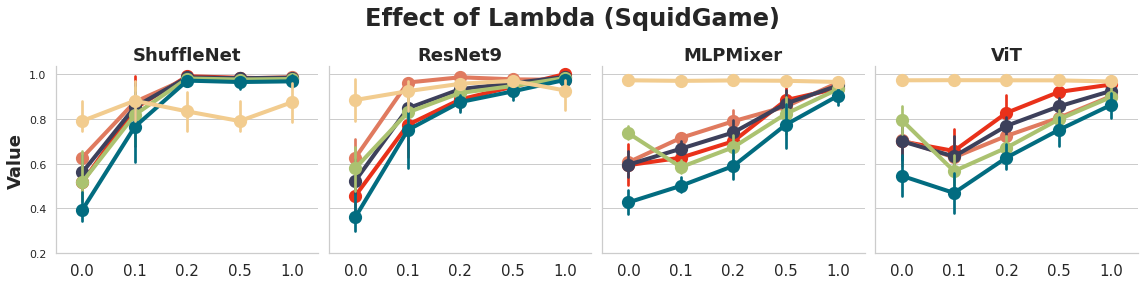

In [10]:
# draw with matplotlib
# set dark background

fig, ax = plt.subplots(1, 4, figsize=(16, 4),
                          sharey=True)
# suptitle
fig.suptitle('Effect of Lambda (SquidGame)', fontsize=24, fontweight='bold')
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='shufflenet'], x='qr_lambda', y='value', hue='variable', ax=ax[0],
              palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='resnet9'], x='qr_lambda', y='value', hue='variable', ax=ax[1],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='mlpmixer'], x='qr_lambda', y='value', hue='variable', ax=ax[2],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='simplevit'], x='qr_lambda', y='value', hue='variable', ax=ax[3],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)


# leave legend box only for the last plot
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()

# remove y axis label for 1, 2, 3
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')

# set y axis label
ax[0].set_ylabel('Value', fontsize=18, fontweight='bold')

# set title
ax[0].set_title('ShuffleNet', fontsize=18, fontweight='bold')
ax[1].set_title('ResNet9', fontsize=18, fontweight='bold')
ax[2].set_title('MLPMixer', fontsize=18, fontweight='bold')
ax[3].set_title('ViT', fontsize=18, fontweight='bold')

# set x axis label as model place on top of the plot
# ax[0].set_xlabel('ShuffleNet', fontsize=20, fontweight='bold', labelpad=10, x=0.5, y=1.1)
# ax[1].set_xlabel('ResNet9', fontsize=20, fontweight='bold')
# ax[2].set_xlabel('MLPMixer', fontsize=20, fontweight='bold')
# ax[3].set_xlabel('ViT', fontsize=20, fontweight='bold')
for i in range(4):
    # set x axis label
    # ax[i].set_xlabel('QR Lambda', fontsize=20)
    # remove spines 
    ax[i].spines[['top', 'right']].set_visible(False)
    # leave some space between x axis label and x axis ticks
    ax[i].xaxis.labelpad = 10
    # set x axis ticks fontsize
    # ax[i].set_xlabel(r'$\lambda$', fontsize=20, fontweight='bold')
    # remove x label
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='x', labelsize=15)
    # set y ticks 
    ax[i].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])

ax[3].legend_.remove()
# save
plt.tight_layout()
plt.savefig('results/lambdaablation/squidgame_lambda_ablation.png', dpi=300, bbox_inches='tight')
            

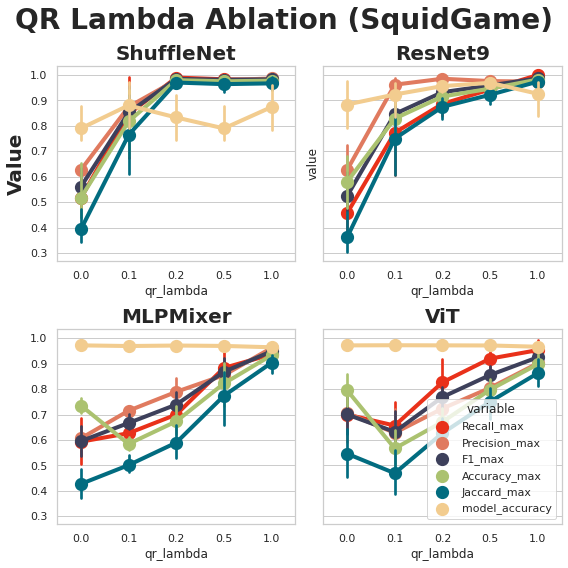

In [45]:
# draw with matplotlib
# set dark background

fig, ax = plt.subplots(2, 2, figsize=(8, 8),
                          sharey=True)
# suptitle
fig.suptitle('QR Lambda Ablation (SquidGame)', fontsize=24, fontweight='bold')
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='shufflenet'], x='qr_lambda', y='value', hue='variable', ax=ax[0][0],
              palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='resnet9'], x='qr_lambda', y='value', hue='variable', ax=ax[0][1],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='mlpmixer'], x='qr_lambda', y='value', hue='variable', ax=ax[1][0],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_results_melt[qr_results_melt['model_name']=='simplevit'], x='qr_lambda', y='value', hue='variable', ax=ax[1][1],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)


# leave legend box only for the last plot
ax[0][0].legend_.remove()
ax[0][1].legend_.remove()
ax[1][0].legend_.remove()

# remove y axis label for 1, 2, 3
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')

# set y axis label
ax[0][0].set_ylabel('Value', fontsize=18, fontweight='bold')

# set title
ax[0][0].set_title('ShuffleNet', fontsize=18, fontweight='bold')
ax[0][1].set_title('ResNet9', fontsize=18, fontweight='bold')
ax[1][0].set_title('MLPMixer', fontsize=18, fontweight='bold')
ax[1][1].set_title('ViT', fontsize=18, fontweight='bold')

# # set x axis label as model place on top of the plot
# # ax[0].set_xlabel('ShuffleNet', fontsize=20, fontweight='bold', labelpad=10, x=0.5, y=1.1)
# # ax[1].set_xlabel('ResNet9', fontsize=20, fontweight='bold')
# # ax[2].set_xlabel('MLPMixer', fontsize=20, fontweight='bold')
# # ax[3].set_xlabel('ViT', fontsize=20, fontweight='bold')
# for i in range(4):
#     # set x axis label
#     # ax[i].set_xlabel('QR Lambda', fontsize=20)
#     # remove spines 
#     ax[i].spines[['top', 'right']].set_visible(False)
#     # leave some space between x axis label and x axis ticks
#     ax[i].xaxis.labelpad = 10
#     # set x axis ticks fontsize
#     ax[i].set_xlabel(r'$\lambda$', fontsize=20, fontweight='bold')
#     ax[i].tick_params(axis='x', labelsize=15)

# # Annotate Lambda on the first plot, left to the x ticks
# #ax[0].annotate(r'$\lambda$', xy=(-0.1, -0.1), xytext=(-0.1, -0.1), xycoords='axes fraction', fontsize=20, fontweight='bold', ha='center', va='center')

# # change legend names
# # legend outside
# handles, labels = ax[3].get_legend_handles_labels()
# ax[3].legend(handles=handles, labels=['Recall', 'Precision', 'F1', 'Accuracy', 'Jaccard', 'Model Accuracy'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
#                 title='Interpretability \nMetrics', title_fontsize=20, fontsize=15) 
# # make legend text bold
# for text in ax[3].get_legend().get_texts():
#     plt.setp(text, fontweight='bold')
# # set legend title bold
# ax[3].get_legend().get_title().set_fontweight('bold')
# # save
plt.tight_layout()
plt.savefig('results/lambdaablation/squidgame_lambda_ablation.png')
            

# Handgesture

In [11]:
qr_hand_results = pd.read_csv("dataset/handgesture/qr_handgesture_cwri_results.csv")
qr_hand_results['qr_lambda'] = 0.0
def set_qr_lambda(df, list_of_exp_name, qr_lambda):
    df.loc[df['EXP_NAME'].isin(list_of_exp_name), 'qr_lambda'] = qr_lambda
    return df
qr_hand_results = set_qr_lambda(qr_hand_results, [8100, 8200, 8300, 8400], 0.1)
qr_hand_results = set_qr_lambda(qr_hand_results, [8101, 8201, 8301, 8401], 0.2)
qr_hand_results = set_qr_lambda(qr_hand_results, [8102, 8202, 8302, 8402], 0.5)
qr_hand_results = set_qr_lambda(qr_hand_results, [8103, 8203, 8303, 8403], 1.0)

view_columns = ['Recall_max', 'Precision_max', 'F1_max',
       'Accuracy_max', 'Jaccard_max','model_accuracy']
max_columns = ['Model_name','qr_lambda','Recall_max', 'Precision_max', 'F1_max',
       'Accuracy_max', 'Jaccard_max','model_accuracy']

In [12]:
qr_hand_results_melt = qr_hand_results[max_columns].melt(id_vars=['Model_name','qr_lambda'], value_vars=view_columns)
qr_hand_results_melt

,Model_name,qr_lambda,variable,value
0,shufflenet,0.0,Recall_max,0.280000
1,shufflenet,0.0,Recall_max,0.400000
2,shufflenet,0.0,Recall_max,0.340000
3,shufflenet,0.0,Recall_max,0.340000
4,shufflenet,0.0,Recall_max,0.420000
...,...,...,...,...
595,simplevit,1.0,model_accuracy,0.418999
596,simplevit,1.0,model_accuracy,0.461249
597,simplevit,1.0,model_accuracy,0.493272
598,simplevit,1.0,model_accuracy,0.482239


In [13]:
# create custom palette with my own colors
my_palette = {'Recall_max': '#e9311a', 'Precision_max': '#E07A5F', 'F1_max': '#3D405B', 'Accuracy_max': '#ABC270', 'Jaccard_max': '#026c80', 'model_accuracy': '#F2CC8F'}


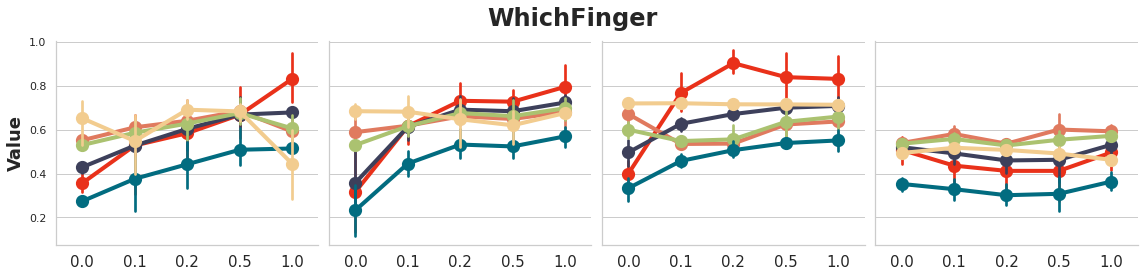

In [16]:
# draw with matplotlib
# set dark background

fig, ax = plt.subplots(1, 4, figsize=(16, 4),
                          sharey=True)
# suptitle, reduce labelpad to bring title closer to the plot
fig.suptitle('WhichFinger', fontsize=24, fontweight='bold', y=0.95)
sns.pointplot(data=qr_hand_results_melt[qr_hand_results_melt['Model_name']=='shufflenet'], x='qr_lambda', y='value', hue='variable', ax=ax[0],
              palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_hand_results_melt[qr_hand_results_melt['Model_name']=='resnet9'], x='qr_lambda', y='value', hue='variable', ax=ax[1],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_hand_results_melt[qr_hand_results_melt['Model_name']=='mlpmixer'], x='qr_lambda', y='value', hue='variable', ax=ax[2],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_hand_results_melt[qr_hand_results_melt['Model_name']=='simplevit'], x='qr_lambda', y='value', hue='variable', ax=ax[3],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)


# leave legend box only for the last plot
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()

# remove y axis label for 1, 2, 3
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')

# set y axis label
ax[0].set_ylabel('Value', fontsize=18, fontweight='bold')

# set title
# ax[0].set_title('ShuffleNet', fontsize=20)
# ax[1].set_title('ResNet9', fontsize=20)
# ax[2].set_title('MLPMixer', fontsize=20)
# ax[3].set_title('ViT', fontsize=20)

# set x axis label as model 
# ax[0].set_xlabel('ShuffleNet', fontsize=20, fontweight='bold')
# ax[1].set_xlabel('ResNet9', fontsize=20, fontweight='bold')
# ax[2].set_xlabel('MLPMixer', fontsize=20, fontweight='bold')
# ax[3].set_xlabel('ViT', fontsize=20, fontweight='bold')
for i in range(4):
    # set x axis label
    # ax[i].set_xlabel('QR Lambda', fontsize=20)
    # remove spines 
    ax[i].spines[['top', 'right']].set_visible(False)
    # leave some space between x axis label and x axis ticks
    ax[i].xaxis.labelpad = 10
    # # set xlabel
    # ax[i].set_xlabel(r'$\lambda$', fontsize=20)
    # remove xlabel
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='x', labelsize=15)
    ax[i].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])



# #Annotate Lambda on the first plot, left to the x ticks
# ax[0].annotate(r'$\lambda$=', xy=(-0.1, -0.1), xytext=(-0.1, -0.1), xycoords='axes fraction', fontsize=20, fontweight='bold', ha='center', va='center')

# change legend names
# # legend outside, place legend on the bottom and write them horizontally
handles, labels = ax[3].get_legend_handles_labels()
ax[3].legend(handles=handles, labels=['Recall', 'Precision', 'F1', 'Interpret Accuracy', 'Jaccard', 'Model Accuracy'], 
                loc='upper center', bbox_to_anchor=(-1.5, -0.2), ncol=6, fontsize=15)

# for text in ax[3].get_legend().get_texts():
#     plt.setp(text, fontweight='bold')
# # set legend title bold
# ax[3].get_legend().get_title().set_fontweight('bold')

# leg = ax[3].get_legend()
# remove legend
ax[3].legend_.remove()
plt.tight_layout()
# save legend as well
plt.savefig('results/lambdaablation/handgesture_lambda_ablation.png', dpi=300, bbox_inches='tight')
            

# Save Legend only

/tmp/ipykernel_2794167/3088234018.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


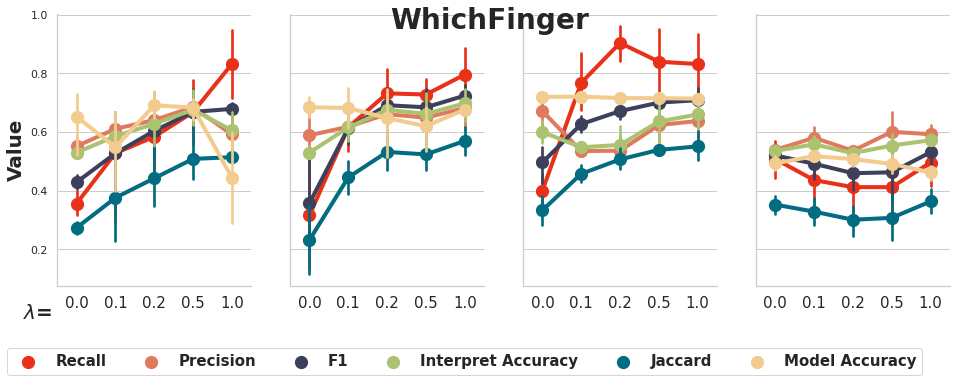

In [101]:
# draw with matplotlib
# set dark background

fig, ax = plt.subplots(1, 4, figsize=(16, 5),
                          sharey=True)
# suptitle, reduce labelpad to bring title closer to the plot
fig.suptitle('WhichFinger', fontsize=28, fontweight='bold', y=0.9)
sns.pointplot(data=qr_hand_results_melt[qr_hand_results_melt['Model_name']=='shufflenet'], x='qr_lambda', y='value', hue='variable', ax=ax[0],
              palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_hand_results_melt[qr_hand_results_melt['Model_name']=='resnet9'], x='qr_lambda', y='value', hue='variable', ax=ax[1],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_hand_results_melt[qr_hand_results_melt['Model_name']=='mlpmixer'], x='qr_lambda', y='value', hue='variable', ax=ax[2],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)
sns.pointplot(data=qr_hand_results_melt[qr_hand_results_melt['Model_name']=='simplevit'], x='qr_lambda', y='value', hue='variable', ax=ax[3],
                palette=my_palette, markers=['o', 'o', 'o', 'o', 'o', 'o'], linestyles=['-', '-', '-', '-', '-', '-'], scale=1.5)


# leave legend box only for the last plot
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()

# remove y axis label for 1, 2, 3
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')

# set y axis label
ax[0].set_ylabel('Value', fontsize=20, fontweight='bold')

# set title
# ax[0].set_title('ShuffleNet', fontsize=20)
# ax[1].set_title('ResNet9', fontsize=20)
# ax[2].set_title('MLPMixer', fontsize=20)
# ax[3].set_title('ViT', fontsize=20)

# set x axis label as model 
# ax[0].set_xlabel('ShuffleNet', fontsize=20, fontweight='bold')
# ax[1].set_xlabel('ResNet9', fontsize=20, fontweight='bold')
# ax[2].set_xlabel('MLPMixer', fontsize=20, fontweight='bold')
# ax[3].set_xlabel('ViT', fontsize=20, fontweight='bold')
for i in range(4):
    # set x axis label
    # ax[i].set_xlabel('QR Lambda', fontsize=20)
    # remove spines 
    ax[i].spines[['top', 'right']].set_visible(False)
    # leave some space between x axis label and x axis ticks
    ax[i].xaxis.labelpad = 10
    # # set xlabel
    # ax[i].set_xlabel(r'$\lambda$', fontsize=20)
    # remove xlabel
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='x', labelsize=15)



#Annotate Lambda on the first plot, left to the x ticks
ax[0].annotate(r'$\lambda$=', xy=(-0.1, -0.1), xytext=(-0.1, -0.1), xycoords='axes fraction', fontsize=20, fontweight='bold', ha='center', va='center')

# change legend names
# # legend outside, place legend on the bottom and write them horizontally
handles, labels = ax[3].get_legend_handles_labels()
ax[3].legend(handles=handles, labels=['Recall', 'Precision', 'F1', 'Interpret Accuracy', 'Jaccard', 'Model Accuracy'], 
                loc='upper center', bbox_to_anchor=(-1.5, -0.2), ncol=6, fontsize=15)

for text in ax[3].get_legend().get_texts():
    plt.setp(text, fontweight='bold')
# set legend title bold
ax[3].get_legend().get_title().set_fontweight('bold')

leg = ax[3].get_legend()
# remove legend
# ax[3].legend_.remove()
plt.tight_layout()
# save legend as well
plt.savefig('results/lambdaablation/legend.png', dpi=300, bbox_inches='tight', bbox_extra_artists=(leg,))
            